In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# Display centered pandas tables
def pd_centered(df):
    return df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}])

# Plot formats
from cycler import cycler
import matplotlib.patches as patches
import matplotlib.mlab as mlab
import matplotlib.dates
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.color'] = 'blue'
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#30a2da', '#e5ae38', '#fc4f30', '#6d904f', '#8b8b8b'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.facecolor'] = '#f0f0f0'
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.labelpad'] = 0.0
mpl.rcParams['axes.xmargin'] = 0.05  # x margin.  See `axes.Axes.margins`
mpl.rcParams['axes.ymargin'] = 0.05  # y margin See `axes.Axes.margins`
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.subplot.left'] = 0.08
mpl.rcParams['figure.subplot.right'] = 0.95
mpl.rcParams['figure.subplot.bottom'] = 0.07

# figure configuration
fsize = (10,7.5) # figure size
tsize = 18 # title font size
lsize = 16 # legend font size
csize = 14 # comment font size
grid = True # grid

%matplotlib inline

# Evolution of subscribers over the years

In [2]:
# Get all the values, per year
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2013 GROUP BY subscriber_type' > data/result1_2013.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2014 GROUP BY subscriber_type' > data/result1_2014.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2015 GROUP BY subscriber_type' > data/result1_2015.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2016 GROUP BY subscriber_type' > data/result1_2016.csv

Waiting on bqjob_r3d826dcc63dd973c_00000168cfd761a2_1 ... (0s) Current status: DONE   

In [3]:
# Put everything in a data frame
year = [2013, 2014, 2015, 2016]
subscriber = []
for y in year:
    name = 'data/result1_%d.csv'%y
    aux = pd.read_csv(name)
    aux.index = ['%d'%y,'%d'%y]
    subscriber.append(aux)
subscriber = pd.concat(subscriber)
subscriber    

,Total_per_subscriber,subscriber_type
2013,76064,Subscriber
2013,24495,Customer
2014,277763,Subscriber
2014,48579,Customer
2015,40530,Customer
2015,305722,Subscriber
2016,23205,Customer
2016,187290,Subscriber


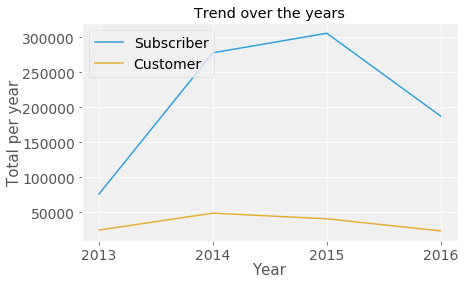

In [4]:
# Visualize the trend over the years

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(subscriber['Total_per_subscriber'].where(subscriber['subscriber_type'] == 'Subscriber').dropna())
ax.plot(subscriber['Total_per_subscriber'].where(subscriber['subscriber_type'] == 'Customer').dropna())
ax.set_xlabel('Year')
ax.set_ylabel('Total per year')
ax.set_title('Trend over the years')
ax.legend(['Subscriber','Customer'], loc='upper left')
plt.show()

As we can see, the company was growing their Subscriber's base, although it seems that in year 2016 the base was going down (we still have 4 months that we don't have). Their Customer's base, however, was in a negative trend last year. We need to understand pricing and the trip distribution to focus the marketing.

In [5]:
# Get all the values, per year
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT round(avg(timestamp_diff(end_date,start_date,minute)),2) Average_Duration, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2013 GROUP BY subscriber_type' > data/result2_2013.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT round(avg(timestamp_diff(end_date,start_date,minute)),2) Average_Duration, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2014 GROUP BY subscriber_type' > data/result2_2014.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT round(avg(timestamp_diff(end_date,start_date,minute)),2) Average_Duration, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2015 GROUP BY subscriber_type' > data/result2_2015.csv
!bq query --use_legacy_sql=FALSE --format=csv 'SELECT round(avg(timestamp_diff(end_date,start_date,minute)),2) Average_Duration, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE   extract(year from end_date) =  2016 GROUP BY subscriber_type' > data/result2_2016.csv

Waiting on bqjob_ra348e2932059ac_00000168cfd77939_1 ... (0s) Current status: DONE     

In [6]:
# Create the panda
duration = []
for y in year:
    name = 'data/result2_%d.csv'%y
    aux = pd.read_csv(name)
    aux.index = ['%d'%y,'%d'%y]
    duration.append(aux)
duration = pd.concat(duration)
duration

,Average_Duration,subscriber_type
2013,10.04,Subscriber
2013,58.68,Customer
2014,9.81,Subscriber
2014,64.89,Customer
2015,67.55,Customer
2015,9.75,Subscriber
2016,49.63,Customer
2016,9.38,Subscriber


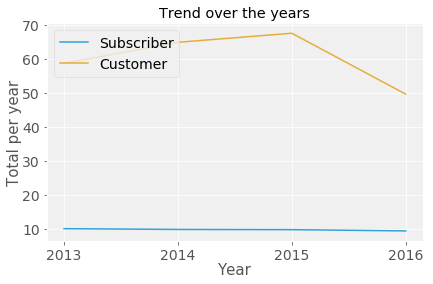

In [7]:
# Visualize the trend over the years

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(duration['Average_Duration'].where(duration['subscriber_type'] == 'Subscriber').dropna())
ax.plot(duration['Average_Duration'].where(duration['subscriber_type'] == 'Customer').dropna())
ax.set_xlabel('Year')
ax.set_ylabel('Total per year')
ax.set_title('Trend over the years')
ax.legend(['Subscriber','Customer'], loc='upper left')
plt.show()

We understand the need to increase the Subscriber's base, because they pay a constant fee, but use the service less than on the spot customers. Also, as we can observe, Customers use the service for around an hour, thus creating marketing campaigns for this group have to be aimed for longers trips, depending on the stations

# Analysis per Station and by Subscriber type

## Customers

In [8]:
# Getting the data
!bq query --use_legacy_sql=false --format=csv 'SELECT start_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer" group by start_station_name order by Number_trips desc limit 20' > data/results3_start.csv 
cust_start = pd.read_csv('data/results3_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT end_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer" group by end_station_name order by Number_trips desc limit 20' > data/results3_end.csv 
cust_end = pd.read_csv('data/results3_end.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.start_station_id=Station.station_id WHERE Trips.start_station_name in (SELECT start_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer"  group by start_station_name order by count(trip_id) desc limit 20)' > data/results3_coord_start.csv 
coord_start = pd.read_csv('data/results3_coord_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.end_station_id=Station.station_id WHERE Trips.end_station_name in (SELECT end_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer"  group by end_station_name order by count(trip_id) desc limit 20)' > data/results3_coord_end.csv 
coord_end = pd.read_csv('data/results3_coord_end.csv')
final_start = pd.merge(cust_start, coord_start, left_index=True, right_index=True)
display(final_start)
final_end = pd.merge(cust_end, coord_end, left_index=True, right_index=True)
display(final_end)

Waiting on bqjob_r205995a48eb18d83_00000168cfd79054_1 ... (0s) Current status: DONE   

,start_station_name,Number_trips,latitude,longitude,landmark
0,Embarcadero at Sansome,13934,37.797900,-122.405942,San Francisco
1,Harry Bridges Plaza (Ferry Building),12441,37.776600,-122.395470,San Francisco
2,Market at 4th,5952,37.789625,-122.400811,San Francisco
3,Powell Street BART,5214,37.799953,-122.398525,San Francisco
4,Embarcadero at Vallejo,4945,37.784878,-122.401014,San Francisco
5,Powell at Post (Union Square),4932,37.776619,-122.417385,San Francisco
6,Steuart at Market,4469,37.788446,-122.408499,San Francisco
7,2nd at Townsend,4436,37.804770,-122.403234,San Francisco
8,San Francisco Caltrain (Townsend at 4th),4299,37.794139,-122.394434,San Francisco
9,Market at Sansome,3874,37.783871,-122.408433,San Francisco


,end_station_name,Number_trips,latitude,longitude,landmark
0,Embarcadero at Sansome,17921,37.797900,-122.405942,San Francisco
1,Harry Bridges Plaza (Ferry Building),11200,37.776600,-122.395470,San Francisco
2,Market at 4th,5759,37.789625,-122.400811,San Francisco
3,Powell Street BART,5225,37.799953,-122.398525,San Francisco
4,Embarcadero at Vallejo,5212,37.784878,-122.401014,San Francisco
5,Steuart at Market,5192,37.776619,-122.417385,San Francisco
6,Powell at Post (Union Square),5036,37.788446,-122.408499,San Francisco
7,San Francisco Caltrain (Townsend at 4th),4882,37.804770,-122.403234,San Francisco
8,2nd at Townsend,4588,37.794139,-122.394434,San Francisco
9,Grant Avenue at Columbus Avenue,4438,37.771058,-122.402717,San Francisco


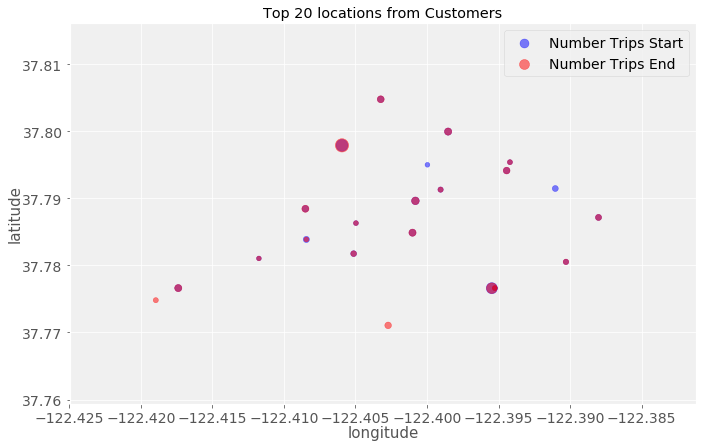

In [9]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111)
final_start.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=final_start["Number_trips"]/100, label="Number Trips Start", figsize=(10,7), color='b')
final_end.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=final_end["Number_trips"]/100, label="Number Trips End", figsize=(10,7), color = 'r')
ax.set_title('Top 20 locations from Customers')
plt.show()

As we can observe, the majority of trips from Customers (short term commitment) start and end around the same areas of the San Francisco bay: Embarcadero and the Market, tourist or entertainment areas. This could mean that this type of consumer uses the App for leisure: trips around the bay. If we want to increase engagement, we should use promotions aroud these stations, especially around the weekends.

## Subscribers

In [10]:
# Getting the data
!bq query --use_legacy_sql=false --format=csv 'SELECT start_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" group by start_station_name order by Number_trips desc limit 20' > data/sresults3_start.csv 
subs_start = pd.read_csv('data/sresults3_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT end_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" group by end_station_name order by Number_trips desc limit 20' > data/sresults3_end.csv 
subs_end = pd.read_csv('data/sresults3_end.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.start_station_id=Station.station_id WHERE Trips.start_station_name in (SELECT start_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  group by start_station_name order by count(trip_id) desc limit 20)' > data/sresults3_coord_start.csv 
coord_start = pd.read_csv('data/sresults3_coord_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.end_station_id=Station.station_id WHERE Trips.end_station_name in (SELECT end_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  group by end_station_name order by count(trip_id) desc limit 20)' > data/sresults3_coord_end.csv 
coord_end = pd.read_csv('data/sresults3_coord_end.csv')
sfinal_start = pd.merge(subs_start, coord_start, left_index=True, right_index=True)
display(sfinal_start)
sfinal_end = pd.merge(subs_end, coord_end, left_index=True, right_index=True)
display(sfinal_end)

Waiting on bqjob_r6990a20f77f3588c_00000168cfd7a88b_1 ... (0s) Current status: DONE   

,start_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),68384,37.797900,-122.405942,San Francisco
1,San Francisco Caltrain 2 (330 Townsend),53694,37.776600,-122.395470,San Francisco
2,Temporary Transbay Terminal (Howard at Beale),37888,37.789625,-122.400811,San Francisco
3,Harry Bridges Plaza (Ferry Building),36621,37.776619,-122.417385,San Francisco
4,2nd at Townsend,35500,37.782259,-122.392738,San Francisco
5,Steuart at Market,34062,37.804770,-122.403234,San Francisco
6,Townsend at 7th,32788,37.794139,-122.394434,San Francisco
7,Market at Sansome,31268,37.787152,-122.388013,San Francisco
8,Embarcadero at Sansome,27203,37.791464,-122.391034,San Francisco
9,Market at 10th,26560,37.792251,-122.397086,San Francisco


,end_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),87132,37.776600,-122.395470,San Francisco
1,San Francisco Caltrain 2 (330 Townsend),56267,37.783871,-122.408433,San Francisco
2,2nd at Townsend,39557,37.789625,-122.400811,San Francisco
3,Harry Bridges Plaza (Ferry Building),38985,37.776619,-122.417385,San Francisco
4,Market at Sansome,37703,37.782259,-122.392738,San Francisco
5,Townsend at 7th,36303,37.804770,-122.403234,San Francisco
6,Temporary Transbay Terminal (Howard at Beale),34439,37.794139,-122.394434,San Francisco
7,Steuart at Market,34406,37.771058,-122.402717,San Francisco
8,Embarcadero at Sansome,28276,37.787152,-122.388013,San Francisco
9,Market at 10th,22195,37.791464,-122.391034,San Francisco


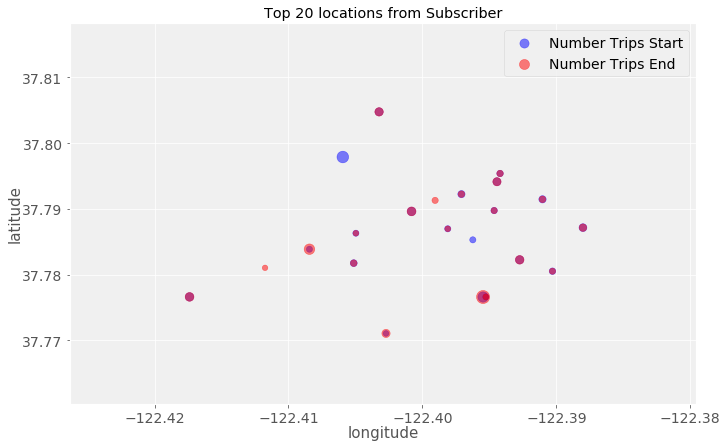

In [11]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111)
sfinal_start.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_start["Number_trips"]/500, label="Number Trips Start", figsize=(10,7), color='b')
sfinal_end.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_end["Number_trips"]/500, label="Number Trips End", figsize=(10,7), color = 'r')
ax.set_title('Top 20 locations from Subscriber')
plt.show()

For Subscriber, the story is different. Although there are stations where several trips end and start (specially the ones close to the Caltrain), there are stations where people only start the the trip (2nd at Townsend), a residential area close to the Bay Bridge, where people come from Oakland, Berkeley, etc. These are the stations where we can capture more new clients. Let's now look at different times frames

### Morning vs. Afternoon trips of Subscribers (Commuting time)

In [12]:
# Getting the data
print('Morning')
print('')
!bq query --use_legacy_sql=false --format=csv 'SELECT start_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and EXTRACT(HOUR FROM start_date) BETWEEN 06 and 10 group by start_station_name order by Number_trips desc limit 5' > data/msresults3_start.csv 
subs_start_m = pd.read_csv('data/msresults3_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT end_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and EXTRACT(HOUR FROM end_date) BETWEEN 06 and 10 group by end_station_name order by Number_trips desc limit 5' > data/msresults3_end.csv 
subs_end_m = pd.read_csv('data/msresults3_end.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.start_station_id=Station.station_id WHERE Trips.start_station_name in (SELECT start_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  and EXTRACT(HOUR FROM start_date) BETWEEN 06 and 10 group by start_station_name order by count(trip_id) desc limit 5)' > data/msresults3_coord_start.csv 
coord_start = pd.read_csv('data/msresults3_coord_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.end_station_id=Station.station_id WHERE Trips.end_station_name in (SELECT end_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  and EXTRACT(HOUR FROM end_date) BETWEEN 06 and 10 group by end_station_name order by count(trip_id) desc limit 5)' > data/msresults3_coord_end.csv 
coord_end = pd.read_csv('data/msresults3_coord_end.csv')
sfinal_start_m = pd.merge(subs_start_m, coord_start, left_index=True, right_index=True)
display(sfinal_start_m)
sfinal_end_m = pd.merge(subs_end_m, coord_end, left_index=True, right_index=True)
display(sfinal_end_m)
print('Afternoon')
print('')
!bq query --use_legacy_sql=false --format=csv 'SELECT start_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and EXTRACT(HOUR FROM start_date) BETWEEN 16 and 20 group by start_station_name order by Number_trips desc limit 5' > data/asresults3_start.csv 
subs_start_a = pd.read_csv('data/asresults3_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT end_station_name, count(trip_id) as Number_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and EXTRACT(HOUR FROM end_date) BETWEEN 16 and 20 group by end_station_name order by Number_trips desc limit 5' > data/asresults3_end.csv 
subs_end_a = pd.read_csv('data/asresults3_end.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.start_station_id=Station.station_id WHERE Trips.start_station_name in (SELECT start_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  and EXTRACT(HOUR FROM start_date) BETWEEN 16 and 20 group by start_station_name order by count(trip_id) desc limit 5)' > data/asresults3_coord_start.csv 
coord_start = pd.read_csv('data/asresults3_coord_start.csv')
!bq query --use_legacy_sql=false --format=csv 'SELECT distinct Station.latitude, Station.longitude, Station.landmark FROM `bigquery-public-data.san_francisco.bikeshare_stations` as Station join `bigquery-public-data.san_francisco.bikeshare_trips` as Trips on Trips.end_station_id=Station.station_id WHERE Trips.end_station_name in (SELECT end_station_name  FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber"  and EXTRACT(HOUR FROM end_date) BETWEEN 16 and 20 group by end_station_name order by count(trip_id) desc limit 5)' > data/asresults3_coord_end.csv 
coord_end = pd.read_csv('data/asresults3_coord_end.csv')
sfinal_start_a = pd.merge(subs_start_a, coord_start, left_index=True, right_index=True)
display(sfinal_start_a)
sfinal_end_a = pd.merge(subs_end_a, coord_end, left_index=True, right_index=True)
display(sfinal_end_a)

Morning

Waiting on bqjob_r2d0f9d2961db8fa2_00000168cfd7c0da_1 ... (0s) Current status: DONE   

,start_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),44524,37.776600,-122.395470,San Francisco
1,San Francisco Caltrain 2 (330 Townsend),33837,37.789756,-122.394643,San Francisco
2,Harry Bridges Plaza (Ferry Building),22123,37.776617,-122.395260,San Francisco
3,Temporary Transbay Terminal (Howard at Beale),21633,37.794139,-122.394434,San Francisco
4,Steuart at Market,16282,37.795392,-122.394203,San Francisco


,end_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),24150,37.776600,-122.395470,San Francisco
1,2nd at Townsend,19770,37.789625,-122.400811,San Francisco
2,Townsend at 7th,18942,37.776617,-122.395260,San Francisco
3,Market at Sansome,15125,37.780526,-122.390288,San Francisco
4,San Francisco Caltrain 2 (330 Townsend),13517,37.771058,-122.402717,San Francisco


Afternoon

Waiting on bqjob_r4077657ebd98a946_00000168cfd7d79f_1 ... (0s) Current status: DONE   

,start_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),17761,37.776600,-122.395470,San Francisco
1,Townsend at 7th,16768,37.789625,-122.400811,San Francisco
2,2nd at Townsend,15060,37.776617,-122.395260,San Francisco
3,San Francisco Caltrain 2 (330 Townsend),13547,37.780526,-122.390288,San Francisco
4,Market at Sansome,13355,37.771058,-122.402717,San Francisco


,end_station_name,Number_trips,latitude,longitude,landmark
0,San Francisco Caltrain (Townsend at 4th),51150,37.776600,-122.395470,San Francisco
1,San Francisco Caltrain 2 (330 Townsend),34721,37.789756,-122.394643,San Francisco
2,Harry Bridges Plaza (Ferry Building),19448,37.776617,-122.395260,San Francisco
3,Temporary Transbay Terminal (Howard at Beale),16753,37.794139,-122.394434,San Francisco
4,Steuart at Market,16365,37.795392,-122.394203,San Francisco


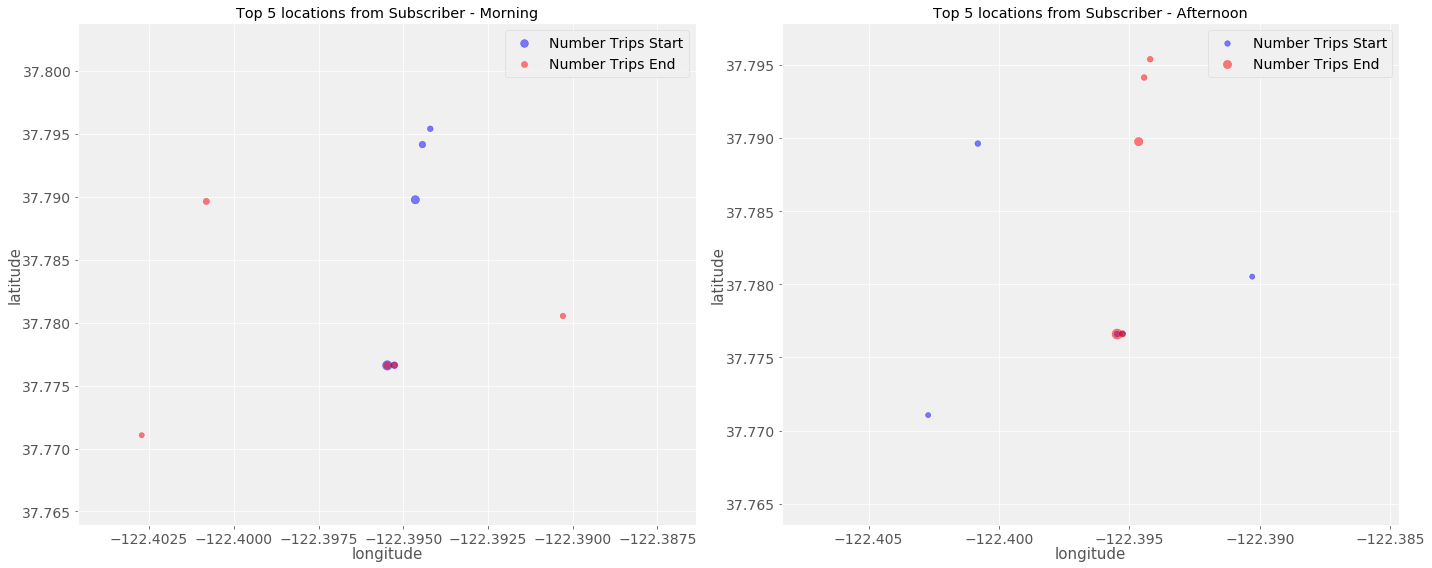

In [13]:
# Visualization
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sfinal_start_m.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_start_m["Number_trips"]/500, label="Number Trips Start", color='b', figsize=(20,8))
sfinal_end_m.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_end_m["Number_trips"]/500, label="Number Trips End", color = 'r')
ax.set_title('Top 5 locations from Subscriber - Morning')
ax = fig.add_subplot(122)
sfinal_start_a.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_start_a["Number_trips"]/500, label="Number Trips Start", color='b')
sfinal_end_a.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
    s=sfinal_end_a["Number_trips"]/500, label="Number Trips End", color = 'r',figsize=(20,8))
ax.set_title('Top 5 locations from Subscriber - Afternoon')
plt.tight_layout()
plt.show()

If we define the morning commute from 6 am to 10 am, and the afternoon commute from 4 pm to 8 pm, we can observe how some stations are use for commuting in the morning (start trip), and then are the ones where several trips end (end trip). Thus we need to launch a marketing campaign near Townsend (2 stations are heavily used there), Sansome, and the Market.

# Analysis of bike's utilization

In [14]:
# Get data
! bq query --use_legacy_sql=false --format=csv 'SELECT round(avg((Status.bikes_available)*100/(Status.bikes_available+Status.docks_available)),2) Usage, Stations.name, Stations.station_id FROM `bigquery-public-data.san_francisco.bikeshare_status` as Status join `bigquery-public-data.san_francisco.bikeshare_stations` as Stations on Status.station_id=Stations.station_id WHERE Status.bikes_available+Status.docks_available <> 0 GROUP BY Stations.name, Stations.station_id ORDER BY Usage desc' > data/results4.csv
util = pd.read_csv('data/results4.csv')
print('Top Idle Stations')
display(util.head())
print('Top Empty Stations')
display(util.tail())

Waiting on bqjob_r73a3cb6f3c90d3f5_00000168cfd7df71_1 ... (0s) Current status: DONE   Top Idle Stations


,Usage,name,station_id
0,58.20,Harry Bridges Plaza (Ferry Building),50
1,58.07,San Francisco Caltrain (Townsend at 4th),70
2,56.75,California Ave Caltrain Station,36
3,55.67,Embarcadero at Bryant,54
4,54.77,San Jose Civic Center,3


Top Empty Stations


,Usage,name,station_id
69,36.96,Golden Gate at Polk,59
70,36.91,Commercial at Montgomery,45
71,31.73,2nd at Folsom,62
72,30.16,S. Market st at Park Ave,89
73,14.70,Cyril Magnin St at Ellis St,91


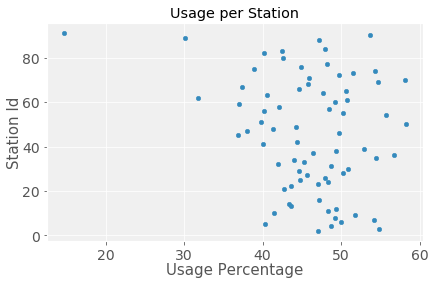

In [15]:
# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111)
util.plot(kind = 'scatter',y = 'station_id', x='Usage', ax=ax)
ax.set_ylabel('Station Id')
ax.set_xlabel('Usage Percentage')
ax.set_title('Usage per Station')
plt.show()

There are several stations with low Usage levels. We need to consider the possibility of closing them and relocate those bikes, or implement a targeted marketing campaign to increase usage (in all those stations with usage levels less than 35%. Finally let's study the usage level in the more used stations by Subscribers

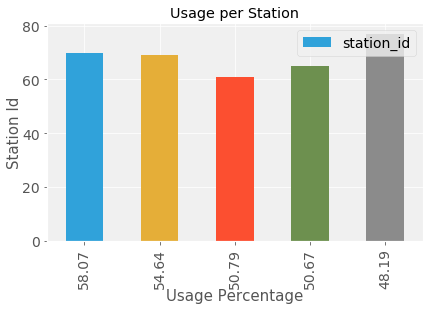

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
util.loc[util.name.isin(sfinal_end_m.end_station_name.values)].plot(kind = 'bar',y = 'station_id', x='Usage', ax=ax)
ax.set_ylabel('Station Id')
ax.set_xlabel('Usage Percentage')
ax.set_title('Usage per Station')
plt.show()

As expected, the more used stations are the ones with the higher usage rates, around 50%. However, this means there as lot of potential growth for new Subscriber, because we are subutilizing the bike's fleet.